# Testing ML Classification Models in a Data Set

- This data set contains information about diabetes. 
- It contains 520 rows and 17 columns. 
- The dataset is clean and has no missing values

In [85]:
# import frameworks
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings("ignore")

In [86]:
# load the dataset
df = pd.read_csv('diabetes_risk_prediction_dataset.csv')

In [87]:
df.shape

(520, 17)

In [88]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [27]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [28]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [29]:
df["class"].unique()

array(['Positive', 'Negative'], dtype=object)

In [53]:
x = df[df["class"] == "Positive"]
length_of_x = len(x)
print("Length of x:", length_of_x)


Length of x: 320


In [55]:
x = df[df["class"] == "Negative"]
length_of_y = len(y)
print("Length of y:", length_of_y)


Length of y: 520


# TESTING A RANDOMFORESTCLASSIFIER MODEL ON THE DATASET

In [56]:
X = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity','Age', 'Gender']]

y = df['class']

In [57]:
#encoding the categorical variables

X_encoded = pd.get_dummies(X)
X_encoded

,Age,Polyuria_No,Polyuria_Yes,Polydipsia_No,Polydipsia_Yes,sudden weight loss_No,sudden weight loss_Yes,weakness_No,weakness_Yes,Polyphagia_No,...,partial paresis_No,partial paresis_Yes,muscle stiffness_No,muscle stiffness_Yes,Alopecia_No,Alopecia_Yes,Obesity_No,Obesity_Yes,Gender_Female,Gender_Male
0,40,True,False,False,True,True,False,False,True,True,...,True,False,False,True,False,True,False,True,False,True
1,58,True,False,True,False,True,False,False,True,True,...,False,True,True,False,False,True,True,False,False,True
2,41,False,True,True,False,True,False,False,True,False,...,True,False,False,True,False,True,True,False,False,True
3,45,True,False,True,False,False,True,False,True,False,...,True,False,True,False,True,False,True,False,False,True
4,60,False,True,False,True,False,True,False,True,False,...,False,True,False,True,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,False,True,False,True,False,True,True,False,False,...,False,True,True,False,True,False,True,False,True,False
516,48,False,True,False,True,False,True,False,True,False,...,False,True,True,False,True,False,True,False,True,False
517,58,False,True,False,True,False,True,False,True,False,...,False,True,False,True,True,False,False,True,True,False
518,32,True,False,True,False,True,False,False,True,True,...,True,False,True,False,False,True,True,False,True,False


I will test the model without using feature importance ( i will use all the available features in the data set)

Confusion Matrix:
[[33  0]
 [ 2 69]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.94      1.00      0.97        33
    Positive       1.00      0.97      0.99        71

    accuracy                           0.98       104
   macro avg       0.97      0.99      0.98       104
weighted avg       0.98      0.98      0.98       104



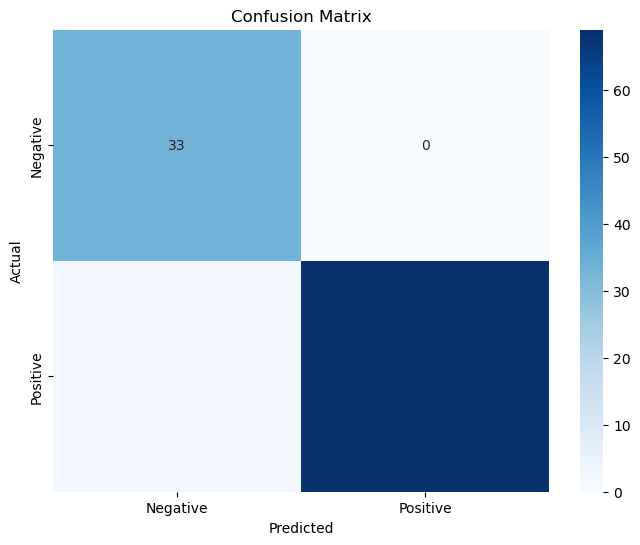

In [58]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Train the Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)
                          

# Evaluate the model with a confusion matrix and classification report

rf_conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Confusion Matrix:")
print(rf_conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('model1.png')
plt.show()

# Extracting the important features:

I will use these two:
- rf feature_importances_ 
- from sklearn.feature_selection import SelectFromModel

Using feature_importances_: 

i will select a threshold of > 0.05 and use the selected features to train the model on the data again and compare the metrics

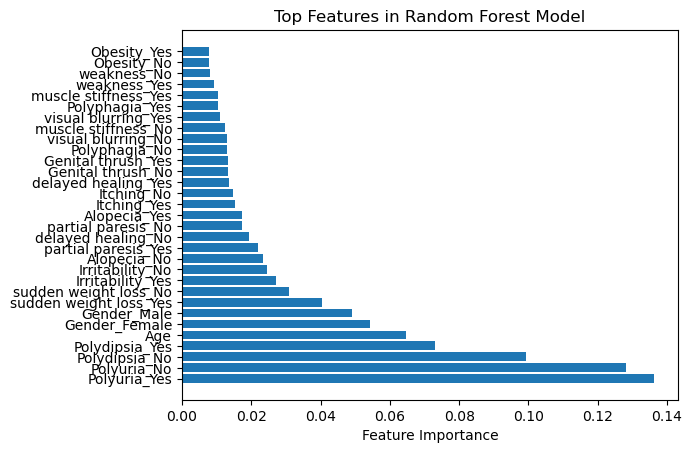

In [59]:
# Access Feature Importance
feature_importance = rf_model.feature_importances_

# Map Feature Importance to Features
feature_names = list(X_encoded.columns)
feature_importance_map = dict(zip(feature_names, feature_importance))

# Sort and Visualize
sorted_features = sorted(feature_importance_map.items(), key=lambda x: x[1], reverse=True)
top_features = [feature[0] for feature in sorted_features]
top_importance = [feature[1] for feature in sorted_features]

plt.barh(top_features, top_importance)
plt.xlabel('Feature Importance')
plt.title('Top Features in Random Forest Model')
plt.savefig('rf_features.png')
plt.show()

In [60]:
rf_features= pd.DataFrame({'Feature': top_features, 'Importance': top_importance})
rf_features = rf_features.sort_values(by='Importance', ascending=False)
rf_features 

,Feature,Importance
0,Polyuria_Yes,0.136326
1,Polyuria_No,0.128090
2,Polydipsia_No,0.099191
3,Polydipsia_Yes,0.072938
4,Age,0.064656
5,Gender_Female,0.054133
6,Gender_Male,0.048958
7,sudden weight loss_Yes,0.040464
8,sudden weight loss_No,0.030867
9,Irritability_Yes,0.027096


In [61]:
# select features above a threshold of 0.05
selected_features = rf_features[rf_features['Importance'] > 0.05]['Feature'].tolist()
print("Selected Features:", selected_features)


Selected Features: ['Polyuria_Yes', 'Polyuria_No', 'Polydipsia_No', 'Polydipsia_Yes', 'Age', 'Gender_Female']


In [62]:
X = X_encoded[['Polyuria_No', 'Polydipsia_No', 'Polydipsia_Yes', 'Polyuria_Yes', 'Age', 'Gender_Female', 'Gender_Male']]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Random Forest model using the selected features
new_model = RandomForestClassifier()
new_model.fit(X_train, y_train)

# Predictions on the test set using the new model
y_pred = new_model.predict(X_test)

# Evaluate the new model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
selected_features_conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(selected_features_conf_matrix)


Accuracy: 0.9038461538461539

Classification Report:
              precision    recall  f1-score   support

    Negative       0.83      0.88      0.85        33
    Positive       0.94      0.92      0.93        71

    accuracy                           0.90       104
   macro avg       0.89      0.90      0.89       104
weighted avg       0.91      0.90      0.90       104


Confusion Matrix:
[[29  4]
 [ 6 65]]


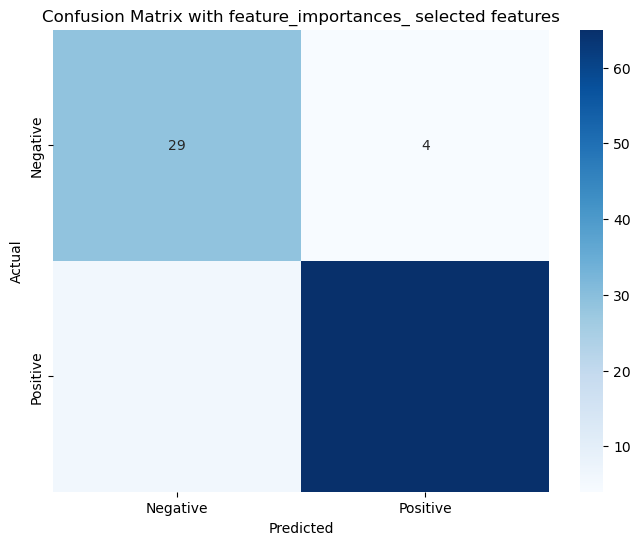

In [63]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with feature_importances_ selected features')
plt.savefig("featureimp.png")
plt.show()

Testing the model to make predictions using a DSS format (Decision Support System)

In [67]:
def predict_condition(new_model, features):
    """
    Predicts the condition based on the input features using the trained model.

    Args:
    - model: Trained machine learning model (e.g., Random Forest classifier)
    - features: Input features for prediction
    
    Returns:
    - prediction: Predicted condition (e.g., 'Positive' or 'Negative')
    """
    prediction = new_model.predict(features)
    return prediction

# Example usage:
new_patient_features = [[0, 1, 0, 1, 75, 0, 1]]
prediction = predict_condition(new_model, new_patient_features)
if prediction[0] == 1:
    print("The patient is predicted to have the condition.")
else:
    print("The patient is predicted not to have the condition.")


The patient is predicted not to have the condition.


# How about using Pearson Correlation Coefficient to determine the important features?

In [68]:
df["class"].unique()

array(['Positive', 'Negative'], dtype=object)

In [69]:
df["class"] = df["class"].apply(lambda x: 1 if x == "Positive" else 0)
df = pd.get_dummies(data = df, drop_first = True)

In [70]:
correlations  = abs(df.corr())

top_5_features =  correlations["class"].sort_values(ascending=False)[1:6].index

print(correlations["class"].sort_values(ascending=False)[1:6])

Polyuria_Yes              0.665922
Polydipsia_Yes            0.648734
Gender_Male               0.449233
sudden weight loss_Yes    0.436568
partial paresis_Yes       0.432288
Name: class, dtype: float64


Now i will train the random forest model on these selected features

In [77]:
X = X_encoded[['Polyuria_Yes', 'Polydipsia_Yes', 'Gender_Male', 'sudden weight loss_Yes', 'partial paresis_Yes']]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Random Forest model using the selected features
new_rfmodel = RandomForestClassifier()
new_rfmodel.fit(X_train, y_train)

# Predictions on the test set using the new model
y_pred = new_rfmodel.predict(X_test)

# Evaluate the new model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
selected_features_conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(selected_features_conf_matrix)


Accuracy: 0.9230769230769231

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.85      0.88        33
           1       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104


Confusion Matrix:
[[28  5]
 [ 3 68]]


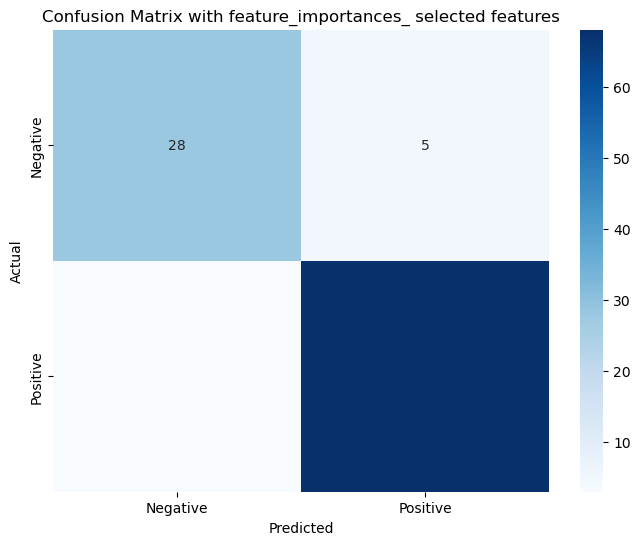

In [78]:
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(selected_features_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with feature_importances_ selected features')
plt.savefig("featureimp.png")
plt.show()

After using the pearson correaltion coefficient suggested top 5 features, the model accuracy improved to 0.92 and the classification matrix led to a different result from the previous classification matrix

In [82]:
#testing the model to make prediction

def predict_class(model, features):
    """
    Predicts the condition based on the input features using the trained model.

    Args:
    - model: Trained machine learning model (e.g., Random Forest classifier)
    - features: Input features for prediction
    
    Returns:
    - prediction: Predicted condition (e.g., 'Positive' or 'Negative')
    """
    prediction = model.predict(features)
    return prediction



# Example usage:
new_patient_features = [[1, 1, 1, 0, 1]]  # Example patient features
prediction = predict_class(new_rfmodel, new_patient_features)
if prediction[0] == 1:
    print("The patient is predicted to have the condition.")
else:
    print("The patient is predicted not to have the condition.")


The patient is predicted to have the condition.


# I will use SelectFromModel to select the best features given a threshold of > 0.05 and using the selected features to train the model

In [89]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


X = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity','Age', 'Gender']]

y = df['class']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Use feature importances for feature selection
sfm = SelectFromModel(rf_model, threshold=0.05)  
sfm.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X_train.columns[sfm.get_support()]

# Transform the features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new model using the selected features
new_model = RandomForestClassifier(random_state=42)
new_model.fit(X_train_selected, y_train)

# Predictions on the test set using the new model
y_pred_selected = new_model.predict(X_test_selected)

# Evaluate the new model
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Selected Feature Names:")
print(selected_feature_names)

# Print accuracy
print("Accuracy with selected features:", accuracy_selected)


Selected Feature Names:
Index(['Age', 'Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No',
       'Polydipsia_Yes'],
      dtype='object')
Accuracy with selected features: 0.8557692307692307


Confusion Matrix:
[[29  4]
 [11 60]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.72      0.88      0.79        33
    Positive       0.94      0.85      0.89        71

    accuracy                           0.86       104
   macro avg       0.83      0.86      0.84       104
weighted avg       0.87      0.86      0.86       104



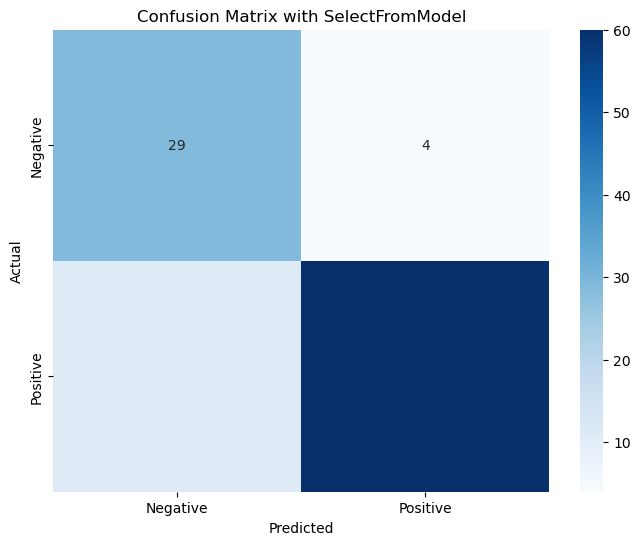

In [90]:
sm_conf_matrix = confusion_matrix(y_test, y_pred_selected)
classification_rep = classification_report(y_test, y_pred_selected)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(sm_conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix with SelectFromModel')
plt.savefig("sfmodel.png")
plt.show()

In [92]:
#testing the model to make prediction based on these features:
#Index(['Age', 'Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No',
 #      'Polydipsia_Yes'],
  #    dtype='object')

def predict_class(model, features):
    """
    Predicts the condition based on the input features using the trained model.

    Args:
    - model: Trained machine learning model (e.g., Random Forest classifier)
    - features: Input features for prediction
    
    Returns:
    - prediction: Predicted condition (e.g., 'Positive' or 'Negative')
    """
    prediction = model.predict(features)
    return prediction



# Example usage:
new_patient_features = [[45, 0, 1, 0, 1]]  # Example patient features
prediction = predict_class(new_model, new_patient_features)
if prediction[0] == 1:
    print("The patient is predicted to have the condition.")
else:
    print("The patient is predicted not to have the condition.")


The patient is predicted not to have the condition.


# Testing LogisticRegression

Confusion Matrix:
[[28  5]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.85      0.88        33
    Positive       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



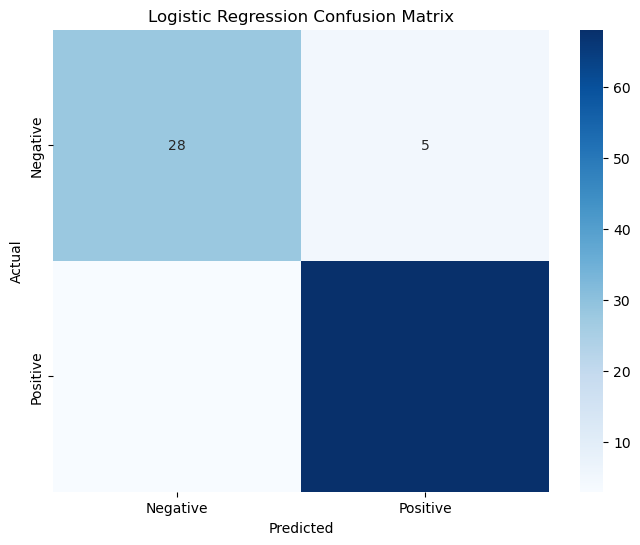

In [93]:
from sklearn.linear_model import LogisticRegression

X = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity','Age', 'Gender']]

y = df['class']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


# Train the Random Forest model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)


y_pred = lr_model.predict(X_test)
                          

# Evaluate the model with a confusion matrix and classification report

lr_conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print("Confusion Matrix:")
print(lr_conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(lr_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.savefig('lrrmodel1.png')
plt.show()

In [94]:
# Get feature importance (coefficients) from the trained model
lr_feature_importances = lr_model.coef_[0]
lr_feature_importances

array([-0.04349455, -1.47594924,  1.47679025, -1.55823544,  1.55907645,
       -0.45320327,  0.45404428, -0.30173312,  0.30257413, -0.24740729,
        0.2482483 , -0.7974479 ,  0.79828891, -0.47137655,  0.47221756,
        0.76679147, -0.76595046, -0.85710385,  0.85794486,  0.32349166,
       -0.32265065, -0.55256385,  0.55340486,  0.10579491, -0.1049539 ,
        0.04111996, -0.04027895,  0.12638594, -0.12554494,  1.39569452,
       -1.39485351])

In [95]:
# Create a DataFrame to display feature importances
lr_feature_importance= pd.DataFrame({'Feature': X_encoded.columns, 'Importance': lr_feature_importances})
lr_feature_importance = lr_feature_importance.sort_values(by='Importance', ascending=False)

# Display the feature importances
print("Linear Regression Feature Importances:")
lr_feature_importance

Linear Regression Feature Importances:


,Feature,Importance
4,Polydipsia_Yes,1.559076
2,Polyuria_Yes,1.476790
29,Gender_Female,1.395695
18,Irritability_Yes,0.857945
12,Genital thrush_Yes,0.798289
15,Itching_No,0.766791
22,partial paresis_Yes,0.553405
14,visual blurring_Yes,0.472218
6,sudden weight loss_Yes,0.454044
19,delayed healing_No,0.323492


In [96]:
# select features above a threshold of 0.05
selected_features = lr_feature_importance[lr_feature_importance['Importance'] > 0.05]['Feature'].tolist()
print("Selected Features:", selected_features)


Selected Features: ['Polydipsia_Yes', 'Polyuria_Yes', 'Gender_Female', 'Irritability_Yes', 'Genital thrush_Yes', 'Itching_No', 'partial paresis_Yes', 'visual blurring_Yes', 'sudden weight loss_Yes', 'delayed healing_No', 'weakness_Yes', 'Polyphagia_Yes', 'Obesity_No', 'muscle stiffness_No']


Accuracy: 0.9326923076923077

Classification Report:
              precision    recall  f1-score   support

    Negative       0.91      0.88      0.89        33
    Positive       0.94      0.96      0.95        71

    accuracy                           0.93       104
   macro avg       0.93      0.92      0.92       104
weighted avg       0.93      0.93      0.93       104


Confusion Matrix:
[[29  4]
 [ 3 68]]


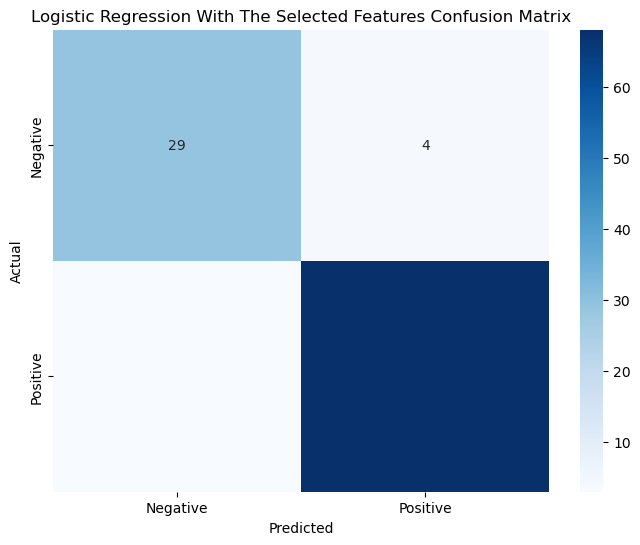

In [97]:
X = X_encoded[['Polydipsia_Yes', 'Polyuria_Yes', 'Gender_Female', 'Irritability_Yes', 'Genital thrush_Yes', 'Itching_No', 'partial paresis_Yes', 'sudden weight loss_Yes', 'visual blurring_Yes', 'delayed healing_No', 'weakness_Yes', 'Polyphagia_Yes', 'Obesity_No', 'muscle stiffness_No']
]
y = df['class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a new Logistic Regression model using the selected features
newlr_model = LogisticRegression()
newlr_model.fit(X_train, y_train)

# Predictions on the test set using the new model
y_pred = newlr_model.predict(X_test)

# Evaluate the new model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
selected_lrfeatures_conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_rep)
print("\nConfusion Matrix:")
print(selected_lrfeatures_conf_matrix)



# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(selected_lrfeatures_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression With The Selected Features Confusion Matrix')
plt.savefig('lrmodel1.png')
plt.show()


In [98]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score


X = df[['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia',
                   'Genital thrush', 'visual blurring', 'Itching', 'Irritability',
                   'delayed healing', 'partial paresis', 'muscle stiffness', 'Alopecia', 'Obesity','Age', 'Gender']]

y = df['class']

# Perform one-hot encoding for categorical variables
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Train the LR model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Use feature importances for feature selection
sfm = SelectFromModel(lr_model, threshold=0.05)  
sfm.fit(X_train, y_train)

# Get the names of the selected features
selected_feature_names = X_train.columns[sfm.get_support()]

# Transform the features
X_train_selected = sfm.transform(X_train)
X_test_selected = sfm.transform(X_test)

# Train a new model using the selected features
new_model = LogisticRegression(random_state=42)
new_model.fit(X_train_selected, y_train)

# Predictions on the test set using the new model
y_pred_selected = new_model.predict(X_test_selected)

# Evaluate the new model
accuracy_selected = accuracy_score(y_test, y_pred_selected)

print("Selected Feature Names:")
print(selected_feature_names)

# Print accuracy
print("Accuracy with selected features:", accuracy_selected)


Selected Feature Names:
Index(['Polyuria_No', 'Polyuria_Yes', 'Polydipsia_No', 'Polydipsia_Yes',
       'sudden weight loss_No', 'sudden weight loss_Yes', 'weakness_No',
       'weakness_Yes', 'Polyphagia_No', 'Polyphagia_Yes', 'Genital thrush_No',
       'Genital thrush_Yes', 'visual blurring_No', 'visual blurring_Yes',
       'Itching_No', 'Itching_Yes', 'Irritability_No', 'Irritability_Yes',
       'delayed healing_No', 'delayed healing_Yes', 'partial paresis_No',
       'partial paresis_Yes', 'muscle stiffness_No', 'muscle stiffness_Yes',
       'Obesity_No', 'Obesity_Yes', 'Gender_Female', 'Gender_Male'],
      dtype='object')
Accuracy with selected features: 0.9230769230769231


Confusion Matrix:
[[28  5]
 [ 3 68]]

Classification Report:
              precision    recall  f1-score   support

    Negative       0.90      0.85      0.88        33
    Positive       0.93      0.96      0.94        71

    accuracy                           0.92       104
   macro avg       0.92      0.90      0.91       104
weighted avg       0.92      0.92      0.92       104



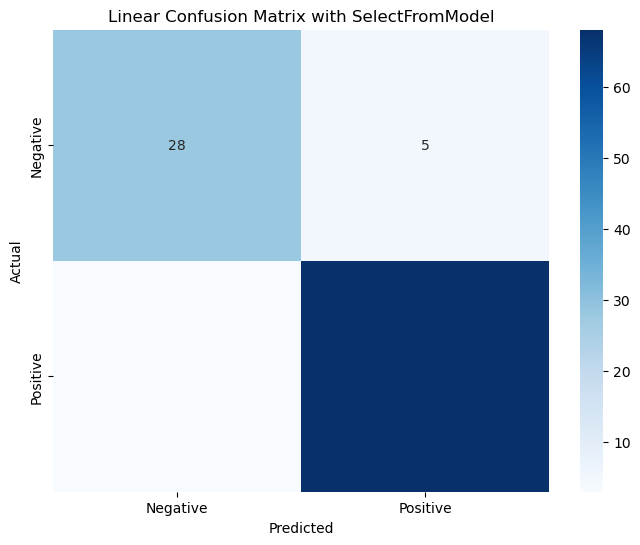

In [99]:
sm_conf_matrix = confusion_matrix(y_test, y_pred_selected)
classification_rep = classification_report(y_test, y_pred_selected)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
print(sm_conf_matrix)
print("\nClassification Report:")
print(classification_rep)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(sm_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Linear Confusion Matrix with SelectFromModel')
plt.savefig("lrsfmodel.png")
plt.show()

# Summary:

- RandomForestClassifier was trained on the data set without selection of any important features.
- Feature importance and the top features were selected based on a threshold of >0.05, and a RandomForestClassifier was trained on the data
- SelectFromModel was used with RandomForestClassifier to select the best features and train the data with the features selected by SelectFromModel
- LogisticRegression was trained on the data set without selection of features.
- Feature importance was implemented and best features were selected via a threshold of >0.05 and the logisticRegression was trained on the data based on the selected features
- SelectFromModel was used with LogisticRegression and the best features were selected and used to train the model on the data set.

- Classification report and confusion matrix were done for each of the model tests

- Please your suggestions/opinions regarding this is appreciated 